# 02. 의사난수 시뮬레이션 (Pseudorandom Numbers)

#### 의사난수 : 의사난수는 실제로는 결정론적 알고리즘을 통해 생성되지만, 겉보기에는 무작위적인 특성을 보이는 숫자들을 의미

<br>


- 컴퓨터는 결정론적(Deterministic) 장치로 설계
- 컴퓨터에서 진정한 무작위성을 시뮬레이션하는 것은 일반적으로 어렵기 때문에, 대부분의 실제 응용에서는 무작위처럼 보이는 결정론적 숫자 순서인 의사난수를 사용
- 대부분의 실제 의사난수 생성 구현은, 정수의 적절한 부분 집합(종종 ${0, ... 2^w - 1}$)에서 균등한 난수를 생성하는 난수 생성기를 기반으로 함
    - 이 숫자들은 쉽게 구간 $[0,1]$에 대한 부동소수점 값의 균등분포로 변환될 수 있음
    
<br>

- 이러한 균등 의사난수 생성은 다양한 통계 소프트웨어 패키지와 프로그래밍 언어에서 제공하는 여러 분포의 난수 생성기 라이브러리의 기반 역할


<br>

## 02-01. 균일 의사난수 생성
- **균등 의사난수 생성기(PRNG)는 무작위성이 필요한 모든 계산의 기반**

#### 좋은 난수 생성기는 다음과 같은 여러 특성을 가짐:
1. **우수한 통계적 특성**: 생성된 숫자들이 통계적으로 무작위성을 잘 나타냄
2. **긴 주기**: 숫자들이 반복되기 전까지의 주기가 길어야 함
3. **효율적이고 컴팩트한 구현**: 계산 비용이 적고 메모리 사용이 효율적
4. **병렬 계산에서의 사용 가능성**: 병렬 환경에서도 문제없이 사용

<br>

* 가장 널리 사용되는 의사난수 생성기는 [MersenneTwister](https://en.wikipedia.org/wiki/Mersenne_Twister)로, 위의 특성들 중 많은 부분을 결합하고 있지만, 병렬 계산 응용에서는 직접 사용할 수 없는 단점이 존재

- 최근에는 Mersenne Twister의 몇 가지 단점을 보완하는 대안으로 [PCG 계열](http://www.pcg-random.org/)의 의사난수 생성기가 주목

<br>

## 02-02. 비균일 의사난수 생성을 위한 변환
- 균등 PRNG(의사난수 생성기)가 주어지면, 비균등 분포를 따르는 난수를 생성하는 가장 간단한 방법은 생성된 숫자들을 변환하는 것
    - 예) $A(x) = ax + b$와 같은 아핀 변환(affine transformation)은 분포의 경계와 스케일(크기)을 조정할 수 있음

- 분포의 형태는 다음 정리에 기반한 비선형 변환을 사용하여 변경

> 만약 $p$가 절대 연속인 누적밀도함수$\Theta_p(x)$를 가진 확률변수이고 $x \sim p$라면,

$$\Theta_p(x) \sim \mathrm{Uniform}(0, 1).$$

> 여기서 역변환 $\Theta^{-1}_p(y)$를 적용하면, 다음 추론이 성립
>
>> 만약 $y \sim Uniform(0, 1)$이라면,

$$\Theta_p^{-1}(y) \sim p$$

<br>

- 누적분포함수 (CDF)변환을 사용할 수 있는 예시 분포
    - 지수분포
    - 이중 지수분포 (Laplace 분포)

<br>

#### 예) 지수분포 예시
- $x \sim Exponential(\lambda)$라면 그 누적분포함수는 $\Theta(x)=1-exp(-\lambda x)$이고,
    그 역함수는 $\Theta^{-1}(y) = - \frac{log(1-y}{\lambda}$
- 여기서 $y\sim Uniform(0, 1)$인 경우, $y$와 $1-y$는 동일한 분포를 따르므로, 
    
    $1-y$를 $y$로 대체하여, 다음과 같은 변환식을 얻을 수 있음
    
$$-\frac{log(y)}{\lambda}$$

**$\rightarrow$** 이와 같이, 균등 의사난수를 변환함으로써, 다양한 비균등 분포를 따르는 난수를 생성할 수 있음

<br>

### 01. 정규분포 난수 생성
- 정규분포를 따르는 난수는 이변량 정규분포의 극좌표 표현을 기반으로 한, Box-Muller 변환을 사용하여 생성할 수 있음

* $x_1, x_2 \sim N(0, 1)$인 경우,

$$p(x_1, x_2) = p(x_1) p(x_2)
= \frac{1}{2\pi} \exp( -\frac{x_1^2 + x_2^2}{2}).$$여기서 $(x_1, x_2)$에서 극좌표로의 변수 변환을 수행할 수 있는데, 추가 매개변수로 제곱된 노름을 사용하여 $(r^2, \theta)$로 변환

즉, $$(x_1, x_2) = (\sqrt{r^2} \cos \theta, \sqrt{r^2} \sin \theta)$$

- 확률밀도함수 변환 규칙에 따르면 $\mathbf{y} = f(\mathbf{x})$일 때,

$$p_y(\mathbf{y}) = p_x(f^{-1}(\mathbf{y})) \left| J_{f^{-1}} \right|,$$으로 변환할 수 있으며, 위와같이 $f^{-1}(x)$를 지정하면, 자코비안 행렬은

$$J_{f^{-1}} =
  \begin{pmatrix}
    -\frac{1}{2\sqrt{r^2}} \cos \theta & -\sqrt{r^2} \sin \theta \\
    -\frac{1}{2 \sqrt{r^2}} \sin \theta & \sqrt{r^2} \cos \theta
  \end{pmatrix},$$이고, 이 행렬의 절댓값 (Determinant)는 $$\left| J_{f^{-1}} \right| = \frac{1}{2}$$

- 따라서 변환된 확률밀도는

$$p(r^2, \theta) = \frac{1}{2 \pi} \cdot \frac{1}{2} \exp( -\frac{r^2}{2}),$$가 되며, 이는 $\theta$에 대해서는 균등분포 (Uniform Distribution), $r^2$에 대해서는 지수분포인 곱의 형태를 이룸
- 두 개의 균등난수 $u_1, u_2$를 사용하여, 누적분포 함수변환을 통해 $r^2$를 시뮬레이션하고, 아핀변환을 통해 $\theta$를 구간 $[0, 2\pi)$에서 균등하게 시뮬레이션할 수 있음

- 이 두변환을 결합하면 $(x_1, x_2)$에 대한 Box-Muller 변환은 다음과 같음

$$(x_1, x_2) = (\sqrt{-2\log u_1} \cos (2 \pi u_2),
  \sqrt{-2\log u_1} \sin (2 \pi u_2)).$$

- 이와 같이 Box-Muller 변환을 사용하면, 두 개의 균등 난수로부터 정규분포를 따르는 난수 쌍 $ 
(𝑥_1, 𝑥_2)$를 생성

<br>

### 02. 변환 방법의 속성
- 변환 방법은 모든 입력 샘플이 출력을 생성하는 데 사용되므로 효율성이 보장
- 그러나 CDF의 역함수를 도출하는 것은 더 복잡한 대상의 경우 어렵거나 실행 불가능할 수도 있음

<br>

## 02-03. 기각 샘플링 (Rejection Sampling)
- Rejection 샘플링은 위에서 언급한 변환 방법을 사용할 수 없는 복잡한 대상 분포에서 샘플을 추출하기 위한 일반적인 대안(alternative)을 제공

<br>

- Rejection 샘플링은 기하학적 아이디어에 기반
    - 타겟분포 $f(x)$(초록색)을 지배하는, 스케일된 취급 가능한 분포 (envelope) $M \cdot g(x)$ (파란색)로 부터 샘플을 추출

    <br>
    
    - **편항되지 않은 (unbiased) $f(x)$의 샘플을 얻기 위해서는, $M\cdot g(x)$가 크지만 $f(x)$는 작은 영역 (빨간 영역)에서 나온 일부 샘플은 기각하여야 함**
    
    $\rightarrow$ 이것이 기각 샘플링

<br>

- 이 과정은, 각 제안 샘플 $x_i$에 대해 추가적으로 $u \sim Uniform(0, 1)$난수를 샘플링하고, 
    
    제안된 $x_i$를 오직 $u\cdot M \cdot g(x_i) < f(x_i)$인 경우에만 채택함으로써 이루어짐
    
    (즉, 검은 점이 빨간 영역이 아닌 초록 영역위에 위치할 때)
    
    ($f(x)$와 $g(x)$는 모두 정규화된 확률 분포여야 함)

<br>

- Rejection 샘플링의 예시.
    - 제안된 점 $x_i$는 $u \cdot g(x_i)$가 $f(x_i) / M$아래의 초록 영역에 위치하기에 수락됨

<img src='https://www.cs.helsinki.fi/u/ahonkela/teaching/compstats1/book/compstats1_files/figure-html/rejsampler-1.png'>

- 모든 $x$에 대해 $f(x) / M < g(x)$가 성립하면, Rejection 샘플링이 타겟분포로부터 샘플을 생성함을 보일 수 있음
- 이 방법은 $g(x)$에서의 샘플링이 용이하고, 동시에 $f(x)$와 가능한 가까울 때 효율적
    - $f(x)$와 $g(x)$가 모두 적절하게 정규화되어 있다고 가정하면, 수락되는 샘플의 비율은 평균적으로 $1/M$
- Rejection 샘플링은 고차원 문제에도 적용할 수 있으나, 차원이 증가할수록 효율적인 $g(x)$를 탐색하는 것이 더 어려워짐

<br>

#### Rejection 샘플링의 구현

In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

- 제안분포 $g(x)$를 사용하여 `f_pdf()`를 따르는 N개의 샘플을 생성

In [2]:
def RejectionSampler(f_pdf, g_pdf, g_sample, M, N):
    i = 0
    x = np.zeros(N)
    
    while i < N:
        x_prop = g_sample()
        u = npr.uniform(0, 1)
        if (u * M * g_pdf(x_prop)) < f_pdf(x_prop):
            x[i] = x_prop
            i += 1
            
    return x

In [4]:
npr.seed(42)

- 정규분포 pdf

In [9]:
def normpdf(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))

- 타겟분포의 pdf를 두 개의 정규분포의 혼합분포로 정의

In [10]:
def target_pdf(x):
    return 0.6*normpdf(x, -2, 0.8) + 0.4*normpdf(x, 2, 1)

- 제안분포의 pdf

In [11]:
def proposal_pdf(x):
    return normpdf(x, 0, 2)

- 제안분포의 pdf를 샘플링하는 함수

In [12]:
def sample_proposal():
    return 2*npr.randn()

- M=3
- 3000개의 샘플

In [19]:
M = 3
N = 3000
mysample = RejectionSampler(target_pdf, proposal_pdf, sample_proposal, M, N)

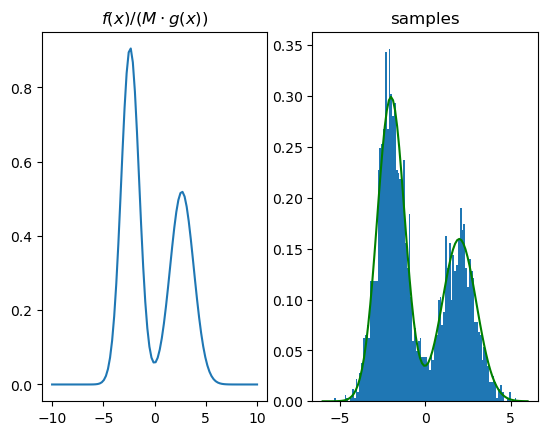

In [17]:
fig, ax = plt.subplots(1, 2)
t = np.linspace(-6, 6, 100)
t2 = np.linspace(-10, 10, 100)
 
ax[0].plot(t2, target_pdf(t2) / (M*proposal_pdf(t2)))
ax[0].set_title('$f(x) / (M \cdot g(x))$')

ax[1].hist(mysample, 100, density=True)
ax[1].plot(t, target_pdf(t), 'g')
ax[1].set_title('samples')
plt.show()

- Rejection 샘플링을 적용하기 전, 모든 $x$에 대해 $\frac{f(x)}{M} < g(x)$ (혹은 $\frac{f(x)}{M \cdot g(x)} < 1$)가 성립하는지 반드시 확인하는 것이 중요
